In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
%matplotlib inline

In [2]:
# Time to split stations into clusters that might have similar demand
# so we can forcast demand and supply for each clusters

df = pd.read_csv('open_data_year_one/2015_station_data.csv')

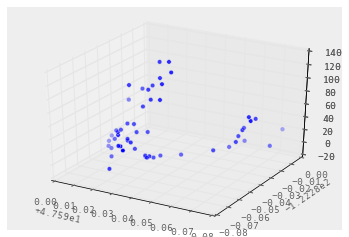

In [3]:
# 3D plot of data; data looks good

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['lat'], df['long'], df['elevation'], marker = 'o')
plt.show()

In [4]:
# Using DBSCAN to find large clusters and outliers (no altitude yet)
db = DBSCAN(min_samples=2, eps = 0.01)
X = df[['lat','long']].values
c = db.fit_predict(X)

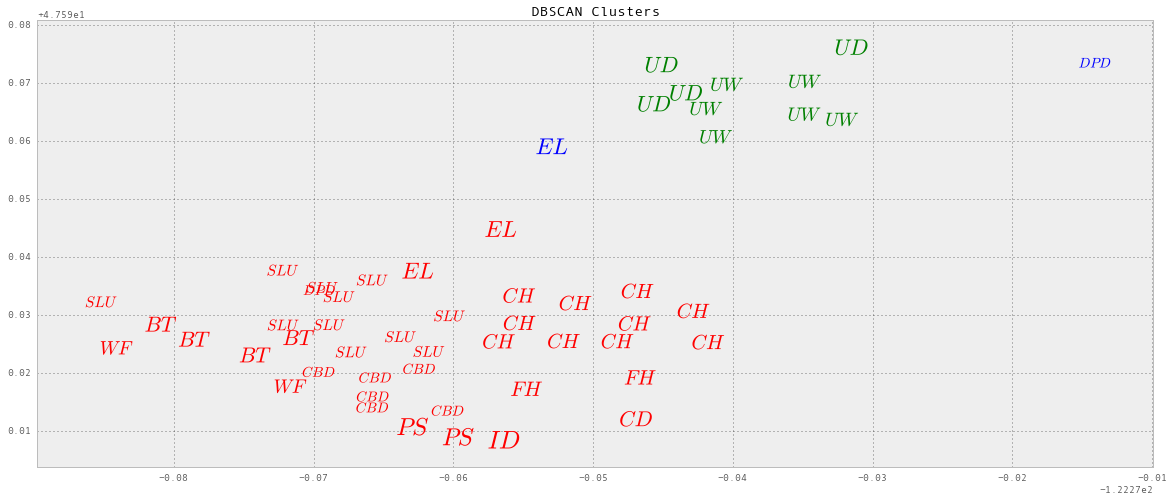

In [5]:
# Plot the clusters

plt.figure(figsize=(20,8))
plt.autoscale(enable=True, axis='both', tight=True)
terminals = df['hood'].values

colors = ['red', 'green', 'blue']
for i, item in enumerate(X):
    plt.scatter(item[1], item[0], s = 1000,
           c= colors[c[i]], 
           marker=r"$ {} $".format(terminals[i]), edgecolors='none' )
plt.title('DBSCAN Clusters')
plt.show()

In [20]:
# Looks like we have a Seattle and UW network plus two outliers.
# Traffic probabily is
import matplotlib.cm as cm


In [9]:
df['big_cluster'] = c

In [10]:
seattle = df.ix[df['big_cluster'] == 0, :]

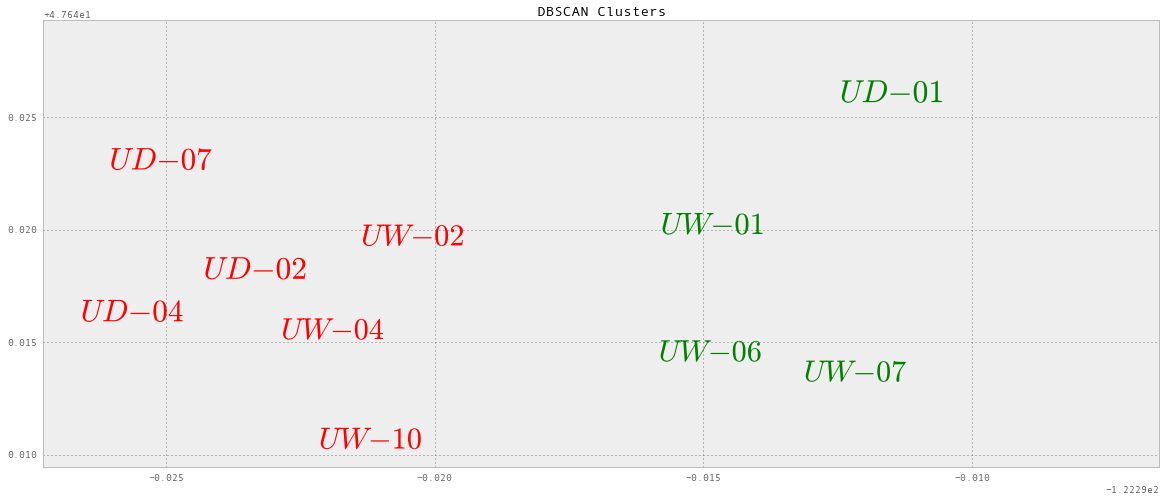

In [108]:
plt.figure(figsize=(20,8))
plt.autoscale(enable=True, axis='both', tight=True)
terminals = seattle['terminal'].values

colors = ['r','g','b','c','brown','m','grey','purple','pink']
X = udist[['lat','long','elevation']].values

for i, item in enumerate(X):
    plt.scatter(item[1], item[0], s = 10000,
           c= colors[c[i]], 
           marker=r"$ {} $".format(udist['terminal'][37 + i]), edgecolors='none' )
plt.title('DBSCAN Clusters')
plt.show()

In [107]:
for i in xrange(2,3):
    km = KMeans(i, init='k-means++') # initialize
    #km = DBSCAN(min_samples=4, eps = 0.005)
    X = udist[['lat','long']].values
   # X[:,2] = 0.5*(X[:,2] - np.mean(X[:,2]))/(np.max(X[:,2]) - np.min(X[:,2]))
#     X[:,1] = (X[:,1] - np.mean(X[:,1]))/(np.max(X[:,1]) - np.min(X[:,1]))

#     X[:,0] = (X[:,0] - np.mean(X[:,0]))/(np.max(X[:,0]) - np.min(X[:,0]))

    c = km.fit_predict(X)
    print i, silhouette_score(X, c)

2 0.398143583096


In [453]:
seattle['cluster'] = c

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [456]:
seattle.to_csv('seattle_clusters.csv', index = False)

In [81]:
seattle['smallgroups'] = c

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [111]:
udist['smallgroups'] = c + 50

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [133]:
other = df.ix[df['big_cluster'] == -1, :]

In [134]:
other['big_cluster'] = -1
other['big_clusters'] = -1

other['smallgroups'] = -1

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to b

In [135]:


df_cluster = pd.concat([seattle,udist, other], axis = 0)

In [136]:
df_cluster = df_cluster.drop(['big_clusters', 'id'], axis = 1)

In [138]:
df_cluster.to_csv('clusters.csv', index = False)